Продажи игр:
https://www.kaggle.com/datasets/gregorut/videogamesales

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
missing_values = df.isnull().sum()
missing_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
duplicates = df.duplicated().sum()
duplicates

0

В датасете есть пропуски в колонках Year и Publisher. Можно наны в колонке Year заменить средним значением(т.к. это несильно изменит остальные параметры, обычно моду используют, если есть выбросы, но в нашем случае это года релизов, выбросов не должно быть), а в Publisher Unknown. Процент пропусков от всего датасета меньше 1, что могло бы позволить пренебречь этими данными и удалить их, но я их оставлю для более точного анализа, несвязанного с колонками, где есть пропуски.



In [44]:
df['Year'].fillna(df['Year'].mean(), inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

df['Publisher'].fillna('Unknown', inplace=True)

In [14]:
statistics = df.describe()
statistics

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.399807,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781426,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Данные включают игры, выпущенные в период с 1980 по 2020 год, с пиком в середине 2000-х годов. Есть значительные различия в продажах между разными играми, это можно заметить по стандартному отклонению.

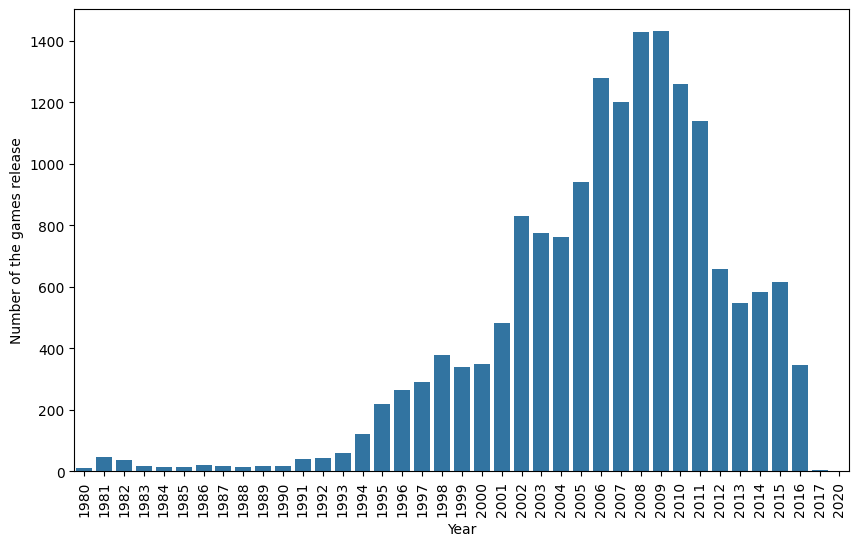

In [16]:
df = df.sort_values(by='Year')
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.ylabel('Number of the games release')
plt.show()

Можно заметить общий тренд увеличения количества выпуска игр с 1980 до середины 2000-х годов. Однако после наблюдается снижение количества выпускаемых игр, что, возможно, говорит о том, что произошли изменения в индустрии( переход на новые платформы, изменение тактики(меньше, но качественнее), развитие онлайн и мобильных игр)

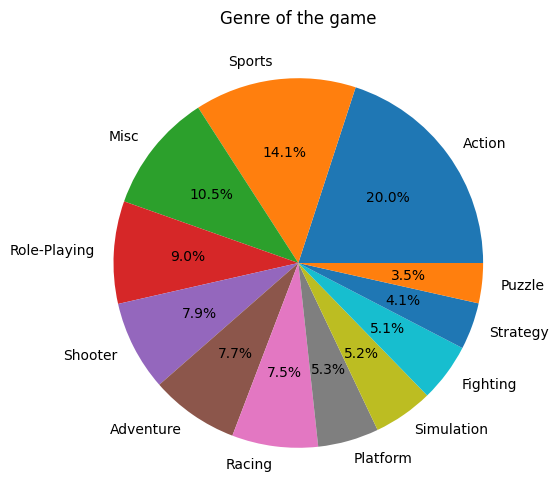

In [18]:
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Genre of the game")
plt.ylabel('')
plt.show()

Большой упор в выпуске игр делали на Action, (занимает 20% от всей диаграммы), далее по популярности следуют Sports и Misc, Role-Playing. Скорее всего, потому что эти игры более динамичные и могут вызвать, по мнению создателей, большую заинтересованность в играх.

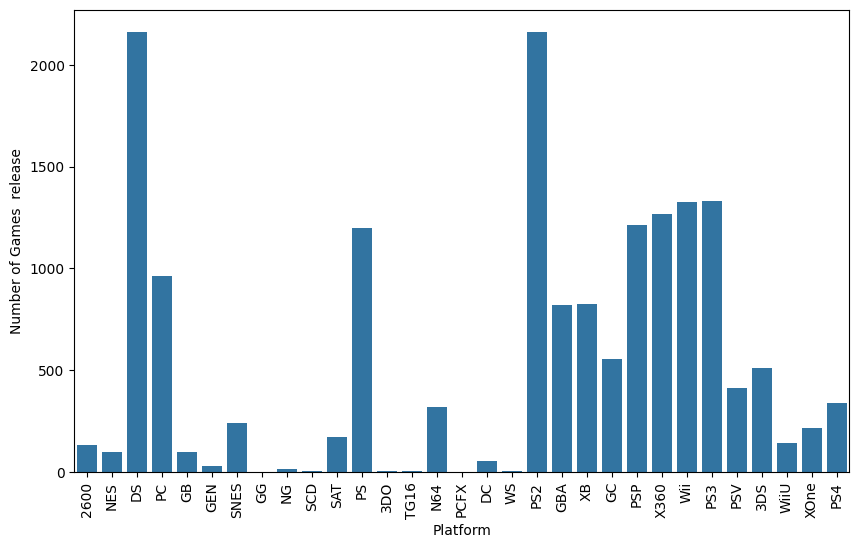

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', data=df)
plt.ylabel('Number of Games  release')
plt.xticks(rotation=90)
plt.show()

In [27]:
platform_pr = (df['Platform'].value_counts() / len(df)) * 100
platform_pr.head(10)


Platform
DS      13.031691
PS2     13.019641
PS3      8.006989
Wii      7.982890
X360     7.621400
PSP      7.308109
PS       7.205687
PC       5.783829
XB       4.964454
GBA      4.952404
Name: count, dtype: float64

Между Sony PS2 и Nintendo DS большая конкуренция, они вносят большой вклад (каждая по 13%) в индустрию игр.

PS3, Wii, Xbox 360, PSP и PlayStation являются следующими по выпуску игр на данных платформах.

Sony со своими разными поколениями PlayStation имеют доминирующую позицию на рынке видеоигр.

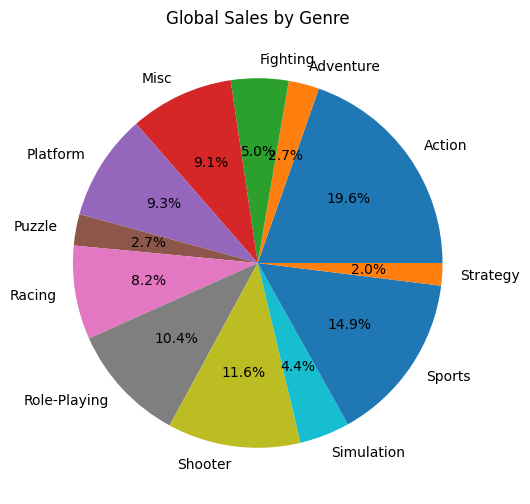

In [36]:
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sales_by_genre.plot(kind='pie', autopct='%1.1f%%')
plt.title("Global Sales by Genre")
plt.ylabel('')
plt.show()

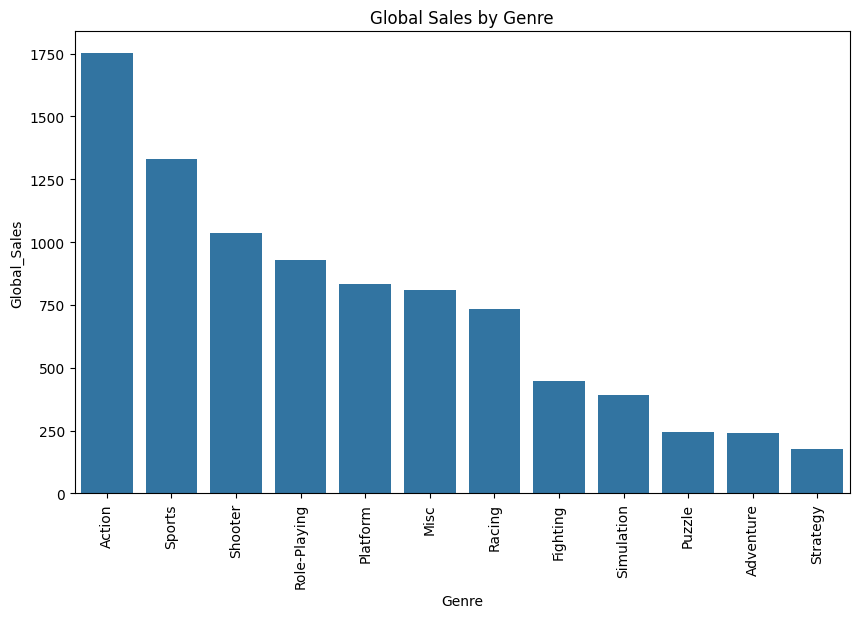

In [38]:
sales_by_genre = sales_by_genre.reset_index().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Global_Sales', data=sales_by_genre)
plt.xticks(rotation=90)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global_Sales')
plt.show()

Как и предполагали создатели игр, наиболее популярными среди покупателей стали жанры с динамическими и активными действиями в виртуальной реальности, также с высокой интерактивностью: Action, Sports и Shooter.

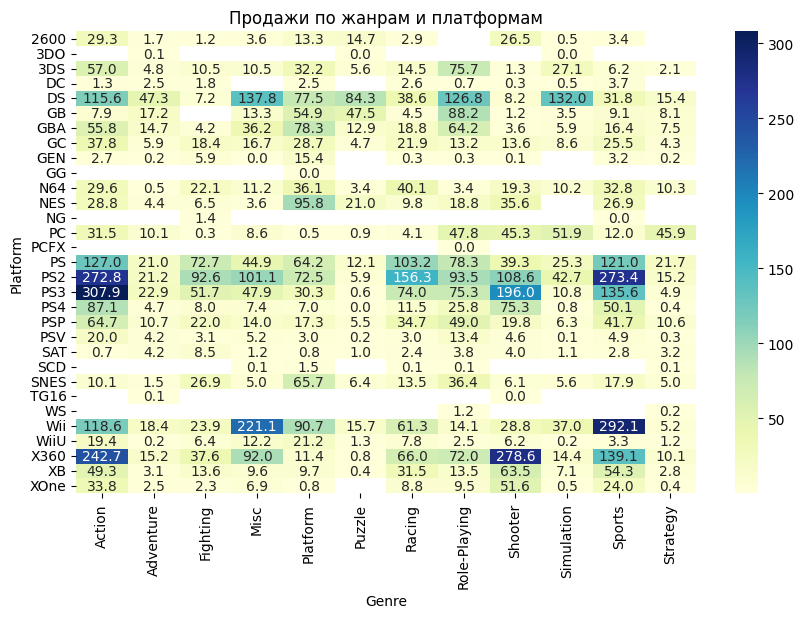

In [41]:
plt.figure(figsize=(10, 6))
platform_genre_sales = df.pivot_table('Global_Sales', index='Platform', columns='Genre', aggfunc='sum')
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Продажи по жанрам и платформам')
plt.show()


  Можно заметить, что эти платформы: PS2, PS3,DS, X360, Wii имеют большие суммарные продажи в жанрах Action, Shooter,Sports. То есть можно предположить, что так как это самые продаваемые жанры, то данные платформы явяляются самыми встречаемыми у пользователей.

  Также можно выявить наиболее универсальные платформы,которые подходят под многие популярные жанры игр: PS2, PS3, X360, Wii.

  Можно предположить, что новые игры лучше разрабатывать на таких платформах, как PS2, PS3,DS, X360, Wii, они более универсальные и имеют высокие продажи. Коррелируя с жанрами, то лучше брать такие жанры, как Action, Shooter,Sports.

  Но, возможно, в таких жанрах(особенно Action) будет большая конкуренция. Поэтому можно выбрать хорошо продаваемый жанр игр на этих платформах, где не так много выпущенных игр. Например, Misc, Role-Playing, Racing, Shooter(хорошо подходит, так как игр, выпущенных именно в этои жанре около 8%, но при этом хорошо продается)

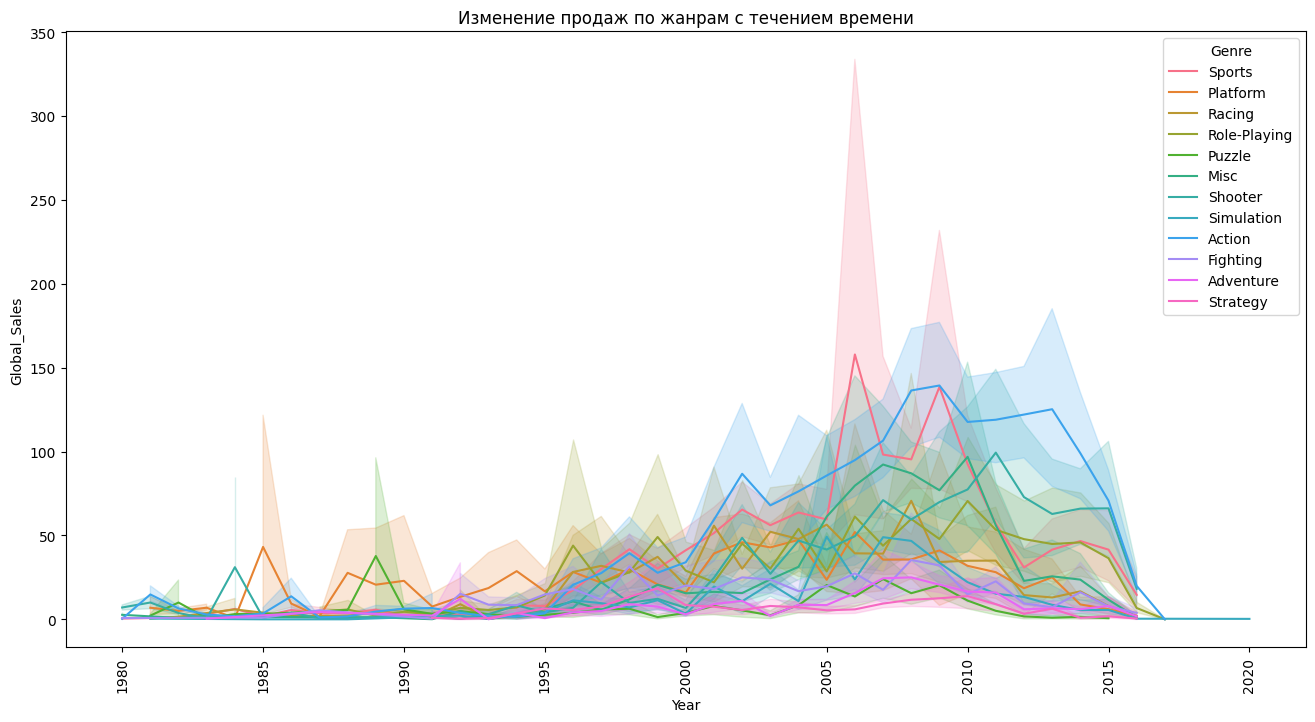

In [45]:

plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title('Изменение продаж по жанрам с течением времени')
plt.show()

Можно также посмотреть продажи по временной ленте: популярными все также остаются Action, Shooter,Sports.

# **Вывод:** После анализа можно сделать выводы, что лучше всего разрабатывать игры на платформах от Sony(разные версии PS), X360 в жанрах Action, Shooter,Sports. Однако, нужно понимат, что в последние годы произошли реформы в индустрии. Поэтому платформы для игр могли измениться, но жанры по популярности остаются примерно те же, то есть динамические с высокой интерактивностью игры